In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

Reglas:

-Si la puntuación del examen es pesima(0-33) y la nota de concepto es regular entonces la nota final es baja

-Si la puntuación del examen es pesima(0-33) y la nota de concepto es bueno entonces la nota final es baja

-Si la puntuación del examen es pesima(0-33) y la nota de concepto es perfecto entonces la nota final es media

-Si la puntuación del examen es regular (33-66) y la nota de concepto es  regular  entonces la nota final es media.

-Si la puntuación del examen es regular (33-66) y la nota de concepto es  bueno  entonces la nota final es media.

-Si la puntuación del examen es regular (33-66) y la nota de concepto es  perfecto  entonces la nota final es alta

-Si la puntuación del examen es perfecta(66-99) y la nota de concepto es regular entonces la nota final es media

-Si la puntuación del examen es perfecta(66-99) y la nota de concepto es bueno entonces la nota final es Alta

-Si la puntuación del examen es perfecta(66-99) y la nota de concepto es perfecto entonces la nota final es Alta

In [36]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
# reglas

x_examen = np.arange(0, 100, 1) #nota examen
x_concepto = np.arange(0,100, 1) #concepto
x_notas  = np.arange(0, 100, 1) #nota final

fuzz.trimf
fuzz.gaussmf
fuzz.gbellmf
fuzz.trapmf

In [60]:
# Generate fuzzy membership functions

examen_pesimo = fuzz.trimf(x_examen, [0, 0, 50])
examen_regular = fuzz.trimf(x_examen, [33, 50, 66])
examen_perfecto = fuzz.trimf(x_examen, [50, 100, 100])


#qual_lo = fuzz.gaussmf(x_qual, 2, 2)
#qual_md = fuzz.gaussmf(x_qual, 5, 1)
#qual_hi = fuzz.gaussmf(x_qual, 8, 0.5)

concepto_regular = fuzz.trimf(x_concepto, [0,0, 100])
concepto_bueno = fuzz.trimf(x_concepto, [0, 50, 100])
concepto_excelente = fuzz.trimf(x_concepto, [0,100, 100])

notas_baja = fuzz.trimf(x_notas, [0, 0, 50])
notas_media = fuzz.trimf(x_notas, [0, 50, 100])
notas_alta = fuzz.trimf(x_notas, [50, 100, 100])

    #aca por lo que veo tengo 3 reglas difusas (qual=calidad, serv=servicio, tip=propina)

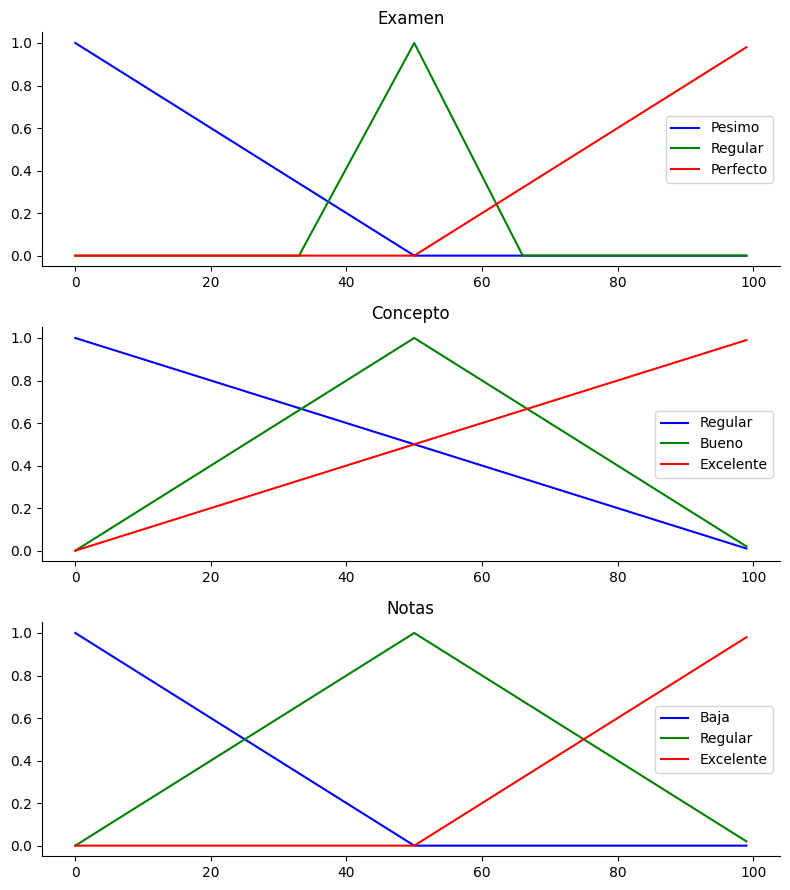

In [61]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_examen, examen_pesimo, 'b', linewidth=1.5, label='Pesimo')
ax0.plot(x_examen, examen_regular, 'g', linewidth=1.5, label='Regular')
ax0.plot(x_examen, examen_perfecto, 'r', linewidth=1.5, label='Perfecto')
ax0.set_title('Examen')
ax0.legend()

ax1.plot(x_concepto, concepto_regular, 'b', linewidth=1.5, label='Regular')
ax1.plot(x_concepto, concepto_bueno, 'g', linewidth=1.5, label='Bueno')
ax1.plot(x_concepto, concepto_excelente, 'r', linewidth=1.5, label='Excelente')
ax1.set_title('Concepto')
ax1.legend()

ax2.plot(x_notas, notas_baja, 'b', linewidth=1.5, label='Baja')
ax2.plot(x_notas, notas_media, 'g', linewidth=1.5, label='Regular')
ax2.plot(x_notas, notas_alta, 'r', linewidth=1.5, label='Excelente')
ax2.set_title('Notas')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

0.0
0.02
0.2


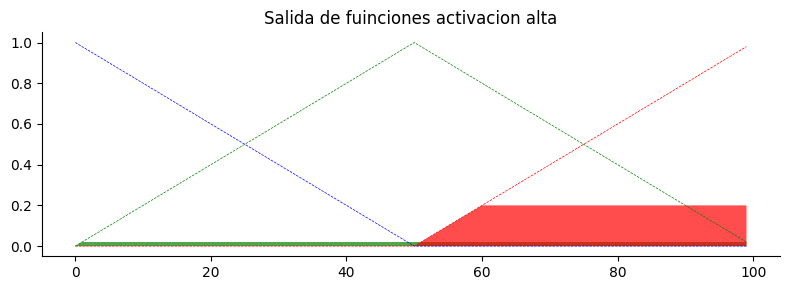

In [68]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!

notaconcepto=99
notaexamen=60


funcion_concepto_regular = fuzz.interp_membership(x_concepto, concepto_regular, notaconcepto)
funcion_concepto_bueno = fuzz.interp_membership(x_concepto, concepto_bueno, notaconcepto)
funcion_concepto_excelente = fuzz.interp_membership(x_concepto, concepto_excelente, notaconcepto)

funcion_examen_pesimo = fuzz.interp_membership(x_examen, examen_pesimo, notaexamen)
funcion_examen_regular = fuzz.interp_membership(x_examen, examen_regular, notaexamen)
funcion_examen_perfecto = fuzz.interp_membership(x_examen, examen_perfecto, notaexamen)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
#-Si la puntuación del examen es pesima(0-33) y la nota de concepto es regular entonces la nota final es baja
active_rule1 = np.fmin(funcion_examen_pesimo, funcion_concepto_regular)
nota_activation_baja = np.fmin(active_rule1, notas_baja)  # removed entirely to 0
print(active_rule1)

#-Si la puntuación del examen es regular (33-66) y la nota de concepto es  bueno  entonces la nota final es media.
active_rule2 = np.fmin(funcion_examen_regular, funcion_concepto_bueno)
nota_activation_media = np.fmin(active_rule2, notas_media)  # removed entirely to 0
print(active_rule2)

#-Si la puntuación del examen es perfecta(66-99) y la nota de concepto es perfecto entonces la nota final es Alta
active_rule3 = np.fmin(funcion_examen_perfecto, funcion_concepto_excelente)
nota_activation_alta = np.fmin(active_rule3, notas_alta)  # removed entirely to 0
print(active_rule3)

nota0 = np.zeros_like(x_notas)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.set_title('Salida de fuinciones activacion baja')
ax0.fill_between(x_notas, nota0, nota_activation_baja, facecolor='b', alpha=0.7)
ax0.plot(x_notas, notas_baja, 'b', linewidth=0.5, linestyle='--', )

#fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.set_title('Salida de fuinciones activacion media')
ax0.fill_between(x_notas, nota0, nota_activation_media, facecolor='g', alpha=0.7)
ax0.plot(x_notas, notas_media, 'g', linewidth=0.5, linestyle='--')

#ax0.set_title('Salida de fuinciones activacion media')
ax0.set_title('Salida de fuinciones activacion alta')
ax0.fill_between(x_notas, nota0, nota_activation_alta, facecolor='r', alpha=0.7)
ax0.plot(x_notas, notas_alta, 'r', linewidth=0.5, linestyle='--')


# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

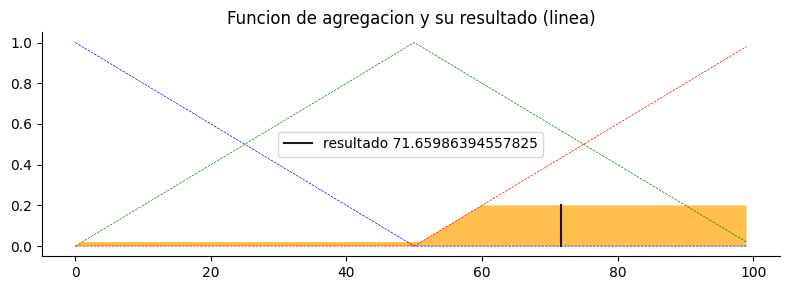

In [69]:
# Aggregate all three output membership functions together
aggregated = np.fmax(nota_activation_baja,
                     np.fmax(nota_activation_media, nota_activation_alta))

# Calculate defuzzified result
notafinal = fuzz.defuzz(x_notas, aggregated, 'centroid')
notafinal_activacion = fuzz.interp_membership(x_notas, aggregated, notafinal)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_notas, notas_baja, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_notas, notas_media, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_notas, notas_alta, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_notas, nota0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([notafinal, notafinal], [0, notafinal_activacion], 'k', linewidth=1.5, alpha=0.9,label='resultado {}'.format(notafinal))
ax0.legend()
ax0.set_title('Funcion de agregacion y su resultado (linea)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

(x: Any, mfx: Any, mode: Any) -> Any
Defuzzification of a membership function, returning a defuzzified value
of the function at x, using various defuzzification methods.

Parameters

x : 1d array or iterable, length N
    Independent variable.
mfx : 1d array of iterable, length N
    Fuzzy membership function.
mode : string
    Controls which defuzzification method will be used.


'centroid': Centroid of area

'bisector': bisector of area

'mom'     : mean of maximum

'som'     : min of maximum

'lom'     : max of maximum